### What is Loss Function?
- Loss function measure the error between predicted output and target value

### Type of Loss Functions
- Regression Loss Functions
    - Used when the model is predicting a continuous value

- Classification Loss Function 
    - Used when the model is predicting a discrete value

In [2]:
import torch
import torch.nn as nn

In [12]:
input = torch.randn(3, 5, requires_grad=True)

1. Mean Absolute Error (L1 Loss Function)
    - Also called L1 Loss, computes the average of the sum of absolute differences between actual values and predicted values.
    - Checks the size of errors in a set of predicted values, without caring about their positive or negative direction.(If the absolute values of the errors are not used, then negative values could cancel out the positive values) 
    - loss(y_true,y_pred) = |y_true - y_pred|
    
- Can be used when:
    - Regression problems, especially when the distribution of the target variable has outliers, such as small or big values that are a great distance from the mean value. It is considered to be more robust to outliers.

In [13]:
target = torch.randn(3, 5)
mae_loss = nn.L1Loss()

In [7]:
output = mae_loss(input, target)
output.backward()

In [8]:
print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.1107, -0.0038,  1.6507, -0.3187,  0.2397],
        [ 1.1945, -1.0605,  0.4191,  1.4788,  1.5318],
        [-1.4300,  0.0287,  1.8928, -0.1129, -0.7722]], requires_grad=True)
target:  tensor([[-0.1284, -0.9867, -0.2489,  0.0564,  0.4212],
        [ 1.0348, -0.0751, -0.5789,  0.7660,  1.0373],
        [-1.9872,  2.1612, -0.0776,  0.5082,  0.4887]])
output:  tensor(0.9047, grad_fn=<L1LossBackward0>)


2. Mean Squared Error Loss Function
    - Also called L2 Loss, computes the average of the squared differences between actual values and predicted values.
    - Pytorch MSE Loss always outputs a positive result, regardless of the sign of actual and predicted values. To enhance the accuracy of the model, you should try to reduce the L2 Loss—a perfect value is 0.0. 
    - The squaring implies that larger mistakes produce even larger errors than smaller ones. If the classifier is off by 100, the error is 10,000. If it’s off by 0.1, the error is 0.01. This punishes the model for making big mistakes and encourages small mistakes. 
    - loss(y_true,y_pred) = (y_true,y_pred)^2
    
- Can be used when- 
    - For regression problems

In [9]:
target = torch.randn(3, 5)
mse_loss = nn.MSELoss()

In [10]:
output = mse_loss(input, target)
output.backward()

In [11]:
print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.1107, -0.0038,  1.6507, -0.3187,  0.2397],
        [ 1.1945, -1.0605,  0.4191,  1.4788,  1.5318],
        [-1.4300,  0.0287,  1.8928, -0.1129, -0.7722]], requires_grad=True)
target:  tensor([[-0.1284, -0.9867, -0.2489,  0.0564,  0.4212],
        [ 1.0348, -0.0751, -0.5789,  0.7660,  1.0373],
        [-1.9872,  2.1612, -0.0776,  0.5082,  0.4887]])
output:  tensor(1.2178, grad_fn=<MseLossBackward0>)


3. Negative Log-Likelihood Loss Function
    - Applied only on models with the softmax function as an output activation layer. Softmax refers to an activation function that calculates the normalized exponential function of every unit in the layer.
    - NLL uses a negative connotation since the probabilities (or likelihoods) vary between zero and one, and the logarithms of values in this range are negative. In the end, the loss value becomes positive.
    - In NLL, minimizing the loss function assists us get a better output. The negative log likelihood is retrieved from approximating the maximum likelihood estimation (MLE). This means that we try to maximize the model’s log likelihood, and as a result, minimize the NLL.  
    - In NLL, the model is punished for making the correct prediction with smaller probabilities and encouraged for making the prediction with higher probabilities. The logarithm does the punishment. 
    - NLL does not only care about the prediction being correct but also about the model being certain about the prediction with a high score. 
    - 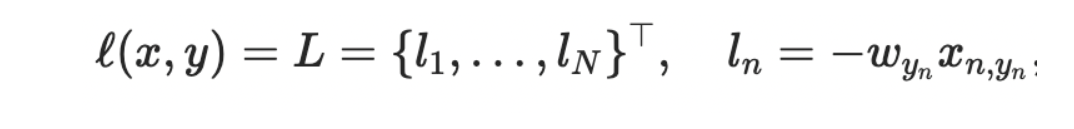
- Can be used when:
    - Multi-class classification problem

In [16]:
target = torch.tensor([1, 0, 4])
m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()

In [17]:
output = nll_loss(m(input), target)
output.backward()

In [18]:
print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 1.4777, -1.0675, -0.1382,  2.6017, -0.3079],
        [-0.0804,  0.1995,  1.6270,  0.8056,  0.4077],
        [-0.0834,  0.0036,  2.0029, -0.5209,  0.9806]], requires_grad=True)
target:  tensor([1, 0, 4])
output:  tensor(2.6942, grad_fn=<NllLossBackward0>)


4. Cross-Entropy Loss Function
    - Computes the difference between two probability distributions for a provided set of occurrences or random variables.
    - Used to work out a score that summarizes the average difference between the predicted values and the actual values. To enhance the accuracy of the model, you should try to minimize the score—the cross-entropy score is between 0 and 1, and a perfect value is 0.
    - Other loss functions, like the squared loss, punish incorrect predictions. Cross-Entropy penalizes greatly for being very confident and wrong.
    - Unlike the Negative Log-Likelihood Loss, which doesn’t punish based on prediction confidence, Cross-Entropy punishes incorrect but confident predictions, as well as correct but less confident predictions. 
    - The Cross-Entropy function has a wide range of variants, of which the most common type is the Binary Cross-Entropy (BCE). The BCE Loss is mainly used for binary classification models; that is, models having only 2 classes. 
    - 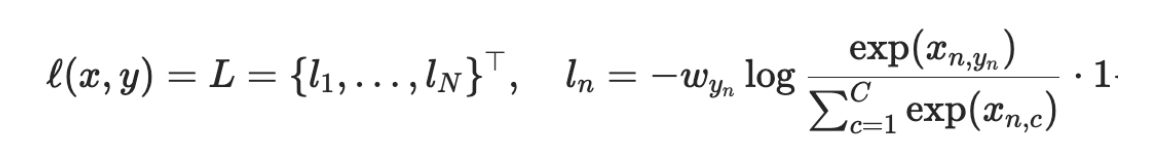
    
- Can be used when:
    - Binary classification tasks, for which it’s the default loss function in Pytorch
    - Creating confident models—the prediction will be accurate and with a higher probability.

In [19]:
target = torch.empty(3, dtype=torch.long).random_(5)

In [20]:
cross_entropy_loss = nn.CrossEntropyLoss()

In [21]:
output = cross_entropy_loss(input, target)
output.backward()

In [22]:
print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 1.4777, -1.0675, -0.1382,  2.6017, -0.3079],
        [-0.0804,  0.1995,  1.6270,  0.8056,  0.4077],
        [-0.0834,  0.0036,  2.0029, -0.5209,  0.9806]], requires_grad=True)
target:  tensor([1, 0, 1])
output:  tensor(3.0199, grad_fn=<NllLossBackward0>)


## Thank You for Reading 
- Please feel free to reach out if you have any query